In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tifffile
from PIL import Image

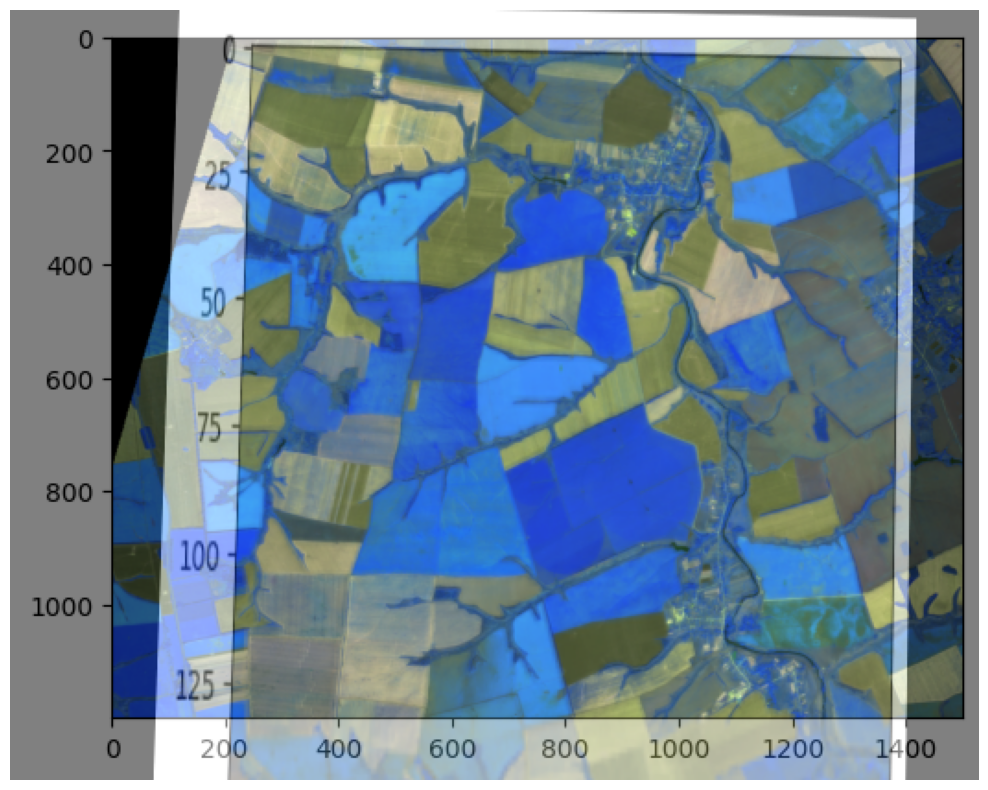

In [11]:
# Re-load the images using the correct file IDs
image5_path = r"C:\Users\Maria Smirnova\Desktop\Проекты\LDT\col_tmp_back.png"
image6_path = r"C:\Users\Maria Smirnova\Desktop\Проекты\LDT\Col_temp.png"

image5 = np.array(Image.open(image5_path))
image6 = np.array(Image.open(image6_path))

# Convert images to grayscale for feature matching
gray_image5 = cv2.cvtColor(image5, cv2.COLOR_BGR2GRAY)
gray_image6 = cv2.cvtColor(image6, cv2.COLOR_BGR2GRAY)

# Initialize ORB detector
orb = cv2.ORB_create()

# Find the keypoints and descriptors with ORB
keypoints1, descriptors1 = orb.detectAndCompute(gray_image5, None)
keypoints2, descriptors2 = orb.detectAndCompute(gray_image6, None)

# Create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(descriptors1, descriptors2)

# Sort them in the order of their distance
matches = sorted(matches, key=lambda x: x.distance)

# Use matches to find the homography matrix and warp the second image to align with the first
src_pts = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)

# Compute homography
H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# Warp the second image to align with the first
height, width, channels = image5.shape
aligned_image = cv2.warpPerspective(image6, H, (width, height))

# Combine the images to visualize alignment
combined_image = cv2.addWeighted(image5, 0.5, aligned_image, 0.5, 0)

# Display the combined image
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
